In [1]:
#Step 0 load libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import StratifiedKFold

In [2]:
#Step 1 Load data
df_raw = pd.read_csv("/workspaces/clases_4geeks/heights.csv")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1050 non-null   int64  
 1   sex         1050 non-null   object 
 2   height      1050 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 24.7+ KB


In [3]:
df_raw.sample(10, random_state=2025)

,Unnamed: 0,sex,height
777,778,Female,61.0
441,442,Male,65.0
286,287,Male,75.0
511,512,Male,73.0
7,8,Female,62.0
290,291,Male,71.0
112,113,Female,66.5
739,740,Male,68.0
34,35,Female,67.0
776,777,Female,61.0


In [4]:
#Step 2 Preprocessing
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()
df_baking['sex'] = df_baking['sex'].astype('category')
df_baking = df_baking[['sex','height']]

df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   sex     1050 non-null   category
 1   height  1050 non-null   float64 
dtypes: category(1), float64(1)
memory usage: 9.5 KB


In [5]:
#Step 3 EDA (Exploratory Data Analysis)
df_train, df_test = train_test_split(df, test_size=0.1, random_state=2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.shape, df_test.shape

((945, 2), (105, 2))

In [6]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
height,945.0,68.386234,4.115576,50.0,66.0,68.8,71.0,82.677165


,count,unique,top,freq
sex,945,2,Male,744


In [7]:
display(df_train[df_train['sex']=='Male']['height'].mean())
display(df_train[df_train['sex']=='Male']['height'].std())

np.float64(69.33533789031412)

np.float64(3.6522437180217744)

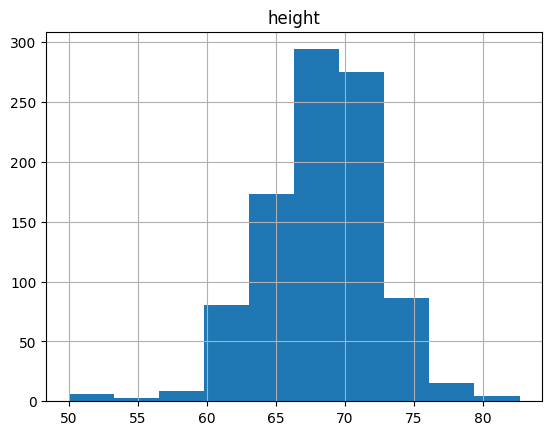

In [8]:
df_train.hist()
plt.show()

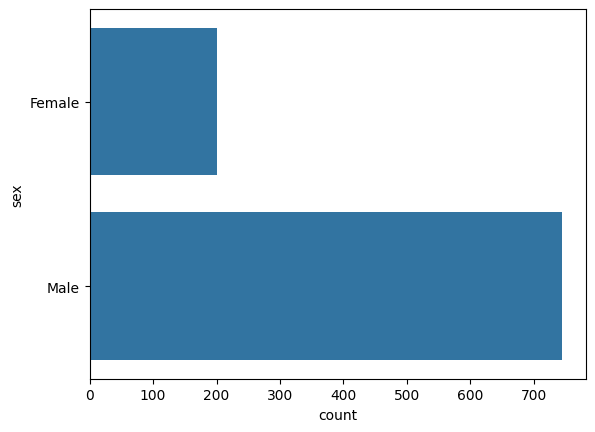

In [9]:
sns.countplot(data=df_train, y='sex')
plt.show()

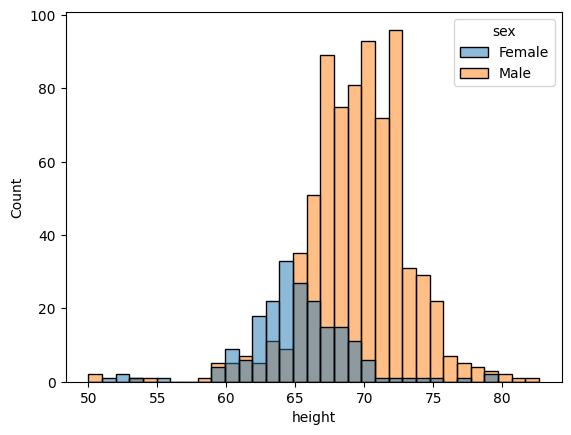

In [10]:
sns.histplot(data=df_train, x='height', hue='sex')
plt.show()

In [11]:
# Step 4. Machine learning
# Separate predictors from labels.
X_train = df_train[['height']] #variables independientes
y_train = df_train['sex'] #Variables dependientes
label_encoder = LabelEncoder()
# 1 es Male, 0 es Female. En tal caso de ser 3 variables, serian 0,1,2
y_train_enc = label_encoder.fit_transform(y_train)

X_test = df_test[['height']]
y_test = df_test['sex']
y_test_enc = label_encoder.transform(y_test)

In [12]:
# Naive model.
y_hat = np.full(len(y_test_enc),1) #Variable fictiia de la prediccion (Todos son Male)

In [13]:
print(f'Accuracy score: {accuracy_score(y_test_enc, y_hat)}') #Calcula la precision

Accuracy score: 0.6476190476190476


---

In [14]:
# Rule Based Model
y_hat_rb = X_test['height'].apply(lambda x: 1 if x>=62 else 0)

In [15]:
print(f'Accuracy score: {accuracy_score(y_test_enc, y_hat_rb)}')

Accuracy score: 0.6857142857142857


---

In [16]:
#Regresion logistica
lr = LogisticRegression()
lr.fit(X_train, y_train_enc)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
y_hat_lr = lr.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test_enc, y_hat_lr)}')

Accuracy score: 0.7333333333333333


---

In [18]:
#Arbol de decision
tree_classifier = DecisionTreeClassifier(class_weight='balanced') # Se ajusta el desbalance de clases.
tree_classifier.fit(X_train, y_train_enc)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [19]:
y_hat_tree = tree_classifier.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test_enc, y_hat_tree)}')

Accuracy score: 0.7238095238095238


---

In [20]:
# Cross validation
cv = StratifiedKFold(n_splits=5)
scores_lr = cross_val_score(lr, X_train, y_train_enc, cv=cv, scoring='accuracy')
print(f'Mean accuracy: {scores_lr.mean():.2f} ± {scores_lr.std():.2f}')

Mean accuracy: 0.81 ± 0.01


---

In [21]:
# Cross validation for tree
cv = StratifiedKFold(n_splits=5)
scores_tree = cross_val_score(tree_classifier, X_train, y_train_enc, cv=cv, scoring='accuracy')
print(f'Mean accuracy: {scores_tree.mean():.2f} ± {scores_tree.std():.2f}')

Mean accuracy: 0.79 ± 0.05
